<a href="https://colab.research.google.com/github/BBANGSUL/Project/blob/main/n223a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **(Urclass Quiz) 다음 조건에서 F beta score를 구하고 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tp = 4442
tn = 6165
fp = 1515
fn = 1930
beta = 2

precision = tp / (tp + fp)
recall = tp / (tp + fn)

fbeta = ((1 + beta ** 2) * precision * recall) / ((beta ** 2) * precision + recall)

fbeta

0.7063126093178567

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(Urclass Quiz) 임계값을 증가시킬때 positive 범주의 재현율 변화 중 올바른 설명을 고르세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [ ]:
import pandas as pd
import numpy as np
import warnings
from google.colab import files
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/kaggle/test.csv')
labels = pd.read_csv('/content/drive/MyDrive/data/kaggle/train_labels.csv')
submission = pd.read_csv('/content/drive/MyDrive/data/kaggle/submission.csv')

In [ ]:
labels = labels['vacc_h1n1_f']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
pipe1 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=10, max_depth=None, oob_score=True)
)

In [ ]:
pipe1.fit(x_train, y_train)
y_pred = pipe1.predict(x_val)
accuracy_score(y_val, y_pred)

0.8146127387024078

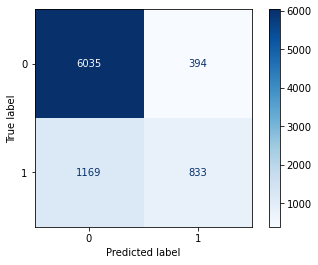

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe1, x_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.show()

In [ ]:
pipe1.classes_

array([0, 1])

In [ ]:
pipe1.predict(x_val)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
pipe1.predict_proba(x_val)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       ...,
       [0.7       , 0.3       ],
       [0.8       , 0.2       ],
       [0.36666667, 0.63333333]])

In [ ]:
y_pred_proba = pipe1.predict_proba(x_val)[:, 1]
y_pred_proba

array([0.        , 0.        , 0.4       , ..., 0.3       , 0.2       ,
       0.63333333])

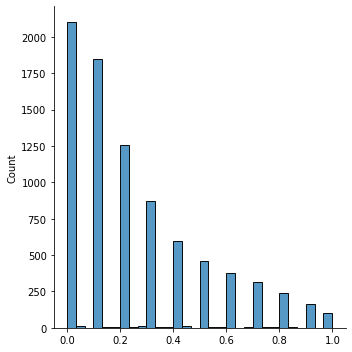

In [ ]:
import seaborn as sns
sns.displot(y_pred_proba)
plt.show()

False    7204
True     1227
dtype: int64

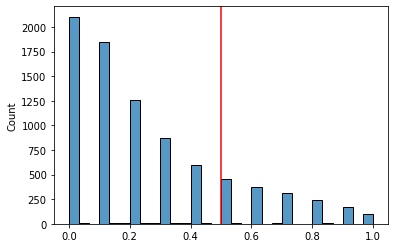

In [ ]:
threshold = 0.5
y_pred_proba = pipe1.predict_proba(x_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [ ]:
from ipywidgets import interact, fixed
from sklearn.metrics import classification_report

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

<function __main__.explore_threshold>

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 하이퍼파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, oob_score=True
- **(Urclass Quiz) 확률값들의 분포의 변화를 아래 보기 중에서 고르세요**
    1. 다양해진다
    2. 변화가없다


In [ ]:
for pipe1.named_steps['randomforestclassifier'].n_estimators in [1, 10, 100, 1000]:
  pipe1.fit(x_train, y_train)
  y_pred_proba = pipe1.predict_proba(x_val)[:, 1]
  print('\n', y_pred_proba)


 [0. 0. 1. ... 0. 1. 1.]

 [0.         0.         0.4        ... 0.3        0.2        0.63333333]

 [0.04       0.01       0.5        ... 0.2        0.1        0.58333333]

 [0.066      0.021      0.509      ... 0.115      0.08583333 0.55801667]


### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
roc = pd.DataFrame({'FPR': fpr, 
                    'TPR' : tpr, 
                    'Thresholds' : thresholds})

In [ ]:
roc

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.987000
1,0.000156,0.000000,0.987000
2,0.000156,0.000500,0.986367
3,0.000311,0.000500,0.978000
4,0.000311,0.000999,0.975633
...,...,...,...
1551,0.998133,1.000000,0.006000
1552,0.999067,1.000000,0.005000
1553,0.999533,1.000000,0.004000
1554,0.999689,1.000000,0.003000


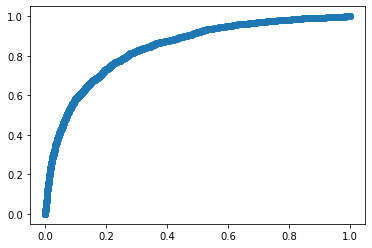

In [ ]:
plt.scatter(fpr, tpr)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(optimal_idx, optimal_threshold)

1017 0.26


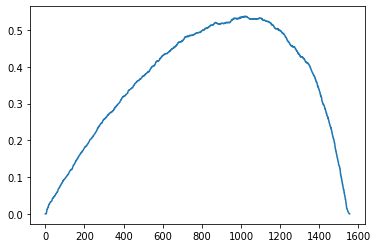

In [ ]:
plt.plot(tpr - fpr)

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold

In [ ]:
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6429
           1       0.51      0.76      0.61      2002

    accuracy                           0.77      8431
   macro avg       0.71      0.77      0.73      8431
weighted avg       0.82      0.77      0.79      8431



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.843533236090399

In [ ]:
pipe2 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression()
)

In [ ]:
pipe2.fit(x_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc',
                                      'opinion_seas_vacc_effective',
                                      'opinion_seas_risk',
                                      'opinion_seas_sick_from_vacc', 'agegrp',
                                      'employment_status', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation', 'state'],
                                mapping=[{'col': 'opinion_h1n1_vacc_eff...
MASSACHUSETTS          28
HAWAII                 29
NEW YORK               30
ILLINOIS               31
DELAWARE               32
NEVADA                 33
FLORIDA                34
MAINE                  35
COLORADO               36
CONNECTICUT            37
LOUISIANA          

In [ ]:
y_pred2 = pipe2.predict(x_val)
y_pred_proba2 = pipe2.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred_proba2)

0.7887246133863025

In [ ]:
from sklearn.ensemble import BaggingClassifier

pipe3 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    BaggingClassifier(n_jobs = -1, random_state = 10)
)

In [ ]:
pipe3.fit(x_train, y_train)
y_pred3 = pipe3.predict(x_val)
y_pred_proba3 = pipe3.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred_proba3)

0.802977975516473

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipe4 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(random_state = 10, learning_rate = 0.36, n_estimators = 102)
)

In [ ]:
pipe4.fit(x_train, y_train)
y_pred4 = pipe4.predict(x_val)
y_pred_proba4 = pipe4.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred_proba4)

0.8566151145479192

In [ ]:
from xgboost import XGBClassifier

pipe5 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(random_state = 10, learning_rate = 0.35, max_depth = 3, n_jobs = -1, n_estimators = 100)
)

In [ ]:
pipe5.fit(x_train, y_train)
y_pred5 = pipe5.predict(x_val)
y_pred_proba5 = pipe5.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred_proba5)

0.8571103029805782

In [ ]:
def to_submit(y_pred, pipe, test):
  y_pred = pd.Series(pipe.predict(test))
  y_pred.name = 'vacc_h1n1_f'
  y_pred.index.name = 'id'
  y_pred.to_csv('submit.csv')
  
  return files.download('submit.csv')

In [ ]:
to_submit(y_pred4, pipe4, test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔥 도전과제(Github - Discussion)

### 5) confusion matrix, classification report 등을 그려 보시고, 각 평가지표들에 대해 최대한 분석하고 precision과 recall 중 어느 것을 높이는 방향으로 모델링 해야할지 논의해 보세요. 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 